In [1]:
!pip install --quiet qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 17.2 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 32.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.4 MB/s eta 0:00:00


In [2]:
!pip install --quiet qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 63.8 MB/s eta 0:00:00:00:0100:01


In [3]:
import random
# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city

In [4]:
def encode_qubits(bits, bases):
    ''' 
        bits - list of bits in str type ('0' or '1')
        bases - list of bases ('X' or 'Z')
        
        job - encodes new qubits by scheme with given bits and bases
        
        predefined scheme:
            Z   X
        0  |0> |+>
        1  |1> |->
        
        return - list of encoded qubits
    '''
    
    # ensure that same amount of bits and bases are received
    assert len(bits) == len(bases)
    
    encoded_qubits = []
    for bit, base in zip(bits, bases):
        # Create new quantum circuit for each qubit
        new_qc = QuantumCircuit(1, 1)
       
        # Apply encoding based on the given scheme
        if bit == '0':
            if base == 'Z':
                # 0 - Z -> |0>
                pass  # Already in |0>
            elif base == 'X':
                # 0 - X -> |+>
                new_qc.h(0)
        elif bit == '1':
            if base == 'Z':
                # 1 - Z -> |1>
                new_qc.x(0)
            elif base == 'X':
                # 1 - X -> |->
                new_qc.x(0)
                new_qc.h(0)
        
        encoded_qubits.append(new_qc)
        
    return encoded_qubits


def measure_qubits(qubits, bases):
    '''
        qubits - received list of qubits to measure
        bases - list of bases ('X' or 'Z') to measure qubits in
        
        job - Measures qubits with given bases
        
        return - list of bits given from performed measurement
    '''
    result_bits = []
    
    simulator = AerSimulator()  # Define simulator once before loop

    for qubit, base in zip(qubits, bases):
        # Create a new circuit to measure the qubit
        new_qc = QuantumCircuit(1, 1)
        new_qc.compose(qubit, inplace=True)  # Add the encoded qubit to the circuit

        # Apply the measurement basis
        if base == 'X':
            new_qc.h(0)  # Apply Hadamard before measurement

        new_qc.measure(0, 0)  # Measure the qubit

        # Transpile the circuit for simulation
        transpiled_qc = transpile(new_qc, simulator)

        # Run and get measurement results
        result = simulator.run(transpiled_qc).result()
        counts = result.get_counts(transpiled_qc)

        # Get the most probable measured bit (either '0' or '1')
        measured_bit = max(counts, key=counts.get)
        result_bits.append(measured_bit)

    return result_bits
      
  


def generate_bits(n):
    ''' n amount of bits generator '''
    return [random.choice(['0', '1']) for i in range(n)]


def generate_bases(n):
    ''' n amount of bases generator '''
    return [random.choice(['Z', 'X']) for i in range(n)]    


def eliminate_differences(bits, indexes):
    ''' 
        new list of bits is created by appending bits from user bits,
        where base indexes are matched. Used in comparing phase to filter out
        agreed bits by matched bases
    '''
    result_key = []
    for i in range(len(bits)):
        if i in indexes:
            result_key.append(bits[i])
    
    return result_key

In [5]:
''' Phase 1: Generate, encode and send '''

# Alice generates 500 random bits and bases
alice_bits = generate_bits(500)
alice_bases = generate_bases(500)

# Encoding qubits by generated bits and bases
encoded_qubits = encode_qubits(alice_bits, alice_bases)

# print data 
print('Alice Bits:')
print(alice_bits)

print('Alice Bases:')
print(alice_bases)

# qubits are sent to bob with quantum channel ...

Alice Bits:
['0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1

In [6]:
''' 
    Phase 3: Bob recieves qubits from Alice, bob does 
    not know yet that qubits are intercepted by Eve
'''

# bob measures recieved qubits with random bases
bob_bases = generate_bases(500)
bob_bits = measure_qubits(encoded_qubits, bob_bases)

# print data 
print('Bob Bases:')
print(bob_bases)

print('Bob Bits:')
print(bob_bits)

Bob Bases:
['Z', 'Z', 'X', 'X', 'X', 'X', 'X', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'X', 'Z', 'Z', 'X', 'X', 'X', 'Z', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'X', 'Z', 'Z', 'Z', 'X', 'X', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'Z', 'X', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'X', 'X', 'Z', 'X', 'X', 'Z', 'X', 'Z', 'X', 'X', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'Z', 'X', 'X', 'Z', 'Z', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'X', 'X', 'X', 'Z', 'X', 'Z', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'X', 'X', 'Z', 'Z', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'X', 'X', 'Z', 'Z', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'X', 'X', 'Z', 'X', 'X', 'X', 'Z', 'Z', 'X', 'X', 'X', 'Z', 'X', 'X', 'X', 'Z'

In [7]:
''' Phase 4: Comparing '''

# alice and bob compare bases on public channel, both eliminates own bits where bases are different.

# determine indexes of matched bases in a list
same_base_indexes = []
for i in range(len(alice_bases)):
    if alice_bases[i] == bob_bases[i]:
        same_base_indexes.append(i)
        
# Alice generates own key by eliminating bits
# encoding with different bases by Alice and Bob
alice_key = eliminate_differences(
    alice_bits,
    same_base_indexes
)

print('Alice key:')
print(alice_key)

# Bob does the same...
bob_key = eliminate_differences(
    bob_bits,
    same_base_indexes
)

print('Bob key:')
print(bob_key)


# if keys are different, qubits are surely intercepted by someone.
# else, secret key is safe to encrypt information with
if alice_key == bob_key:
    print('Key is safe to use!')
    print(f'Key length: {len(alice_key)}') 
else:
    print('\n Key is compromised and is not safe!')

Alice key:
['1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1'

In [8]:
original_key=alice_key

In [9]:
def measure_qubits_photon_loss(qubits, bases, photon_loss_prob):
    ''' 
        Measure qubits using the given bases and introduce noise & photon loss
    '''
    result_bits = []
    simulator = AerSimulator()

    for qubit, base in zip(qubits, bases):
        if random.random() < photon_loss_prob:  # Simulate photon loss
            result_bits.append(None)  # Lost photon (no measurement)
            continue

        new_qc = QuantumCircuit(1, 1)
        new_qc.compose(qubit, inplace=True)

        if base == 'X':
            new_qc.h(0)

        new_qc.measure(0, 0)
        transpiled_qc = transpile(new_qc, simulator)

        # Simulate measurement with potential noise (bit flip)
        result = simulator.run(transpiled_qc).result()
        counts = result.get_counts(transpiled_qc)
        measured_bit = max(counts, key=counts.get)

        
        result_bits.append(measured_bit)

    return result_bits

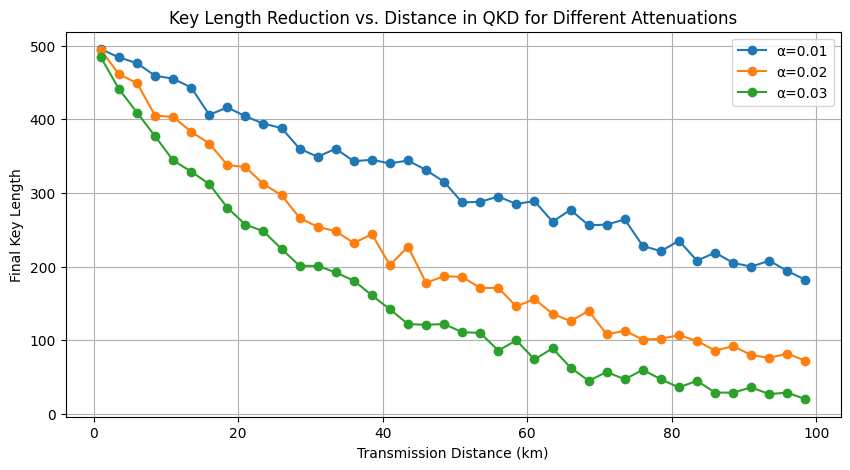

In [14]:
# Simulate Key Length Reduction vs. Distance for Different Attenuation Coefficients
num_bits = 500  # Initial number of bits
attenuation_coefficients = [0.01, 0.02, 0.03]  # Different attenuation levels
distances = np.arange(1, 101, 2.5)  # Distances in km

plt.figure(figsize=(10, 5))

for attenuation_coefficient in attenuation_coefficients:
    key_lengths = []
    for d in distances:
        photon_loss_prob = 1 - np.exp(-attenuation_coefficient * d)  # Exponential loss model
        received_bits = measure_qubits_photon_loss(encoded_qubits, bob_bases, photon_loss_prob)
        final_key_length = sum(1 for bit in received_bits if bit is not None)  # Count received bits
        key_lengths.append(final_key_length)
    
    plt.plot(distances, key_lengths, marker='o', linestyle='-', label=f'α={attenuation_coefficient}')

# Plot Key Length vs. Distance
plt.xlabel('Transmission Distance (km)')
plt.ylabel('Final Key Length')
plt.title('Key Length Reduction vs. Distance in QKD for Different Attenuations')
plt.legend()
plt.grid()
plt.show()



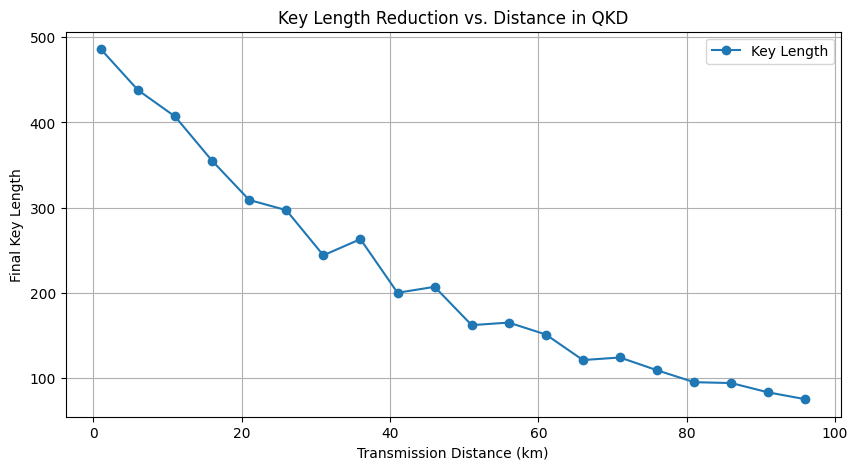

In [13]:
import matplotlib.pyplot as plt
# Plot Key Length vs. Distance
plt.figure(figsize=(10, 5))
plt.plot(distances, key_lengths, marker='o', linestyle='-', label='Key Length')
plt.xlabel('Transmission Distance (km)')
plt.ylabel('Final Key Length')
plt.title('Key Length Reduction vs. Distance in QKD')
plt.legend()
plt.grid()
plt.show()
